#  Total number of Home Wins, Draws, and Away Wins

Import necessary libraries

In [2]:
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The `BASE_URL` will point the notebook at the Django API. If using localhost, the Django projcet must be running.

In [25]:
BASE_URL = 'http://127.0.0.1:8000/api/'
next_url = BASE_URL + 'players'

The `heights` array contains the heights of all of the players returned from the API.

In [26]:
heights = []
weights = []

The API is paginated, with the `next` field being `null` when the last page is reached

In [27]:
while next_url is not None:
    response = requests.get(next_url)
    data = json.loads(response.text)
    
    for player in data['results']:
        if player['height'] != '':
            heights.append(float(player['height']))
        if player['weight'] != '':
            weights.append(float(player['weight']))
    
    next_url = data['next']

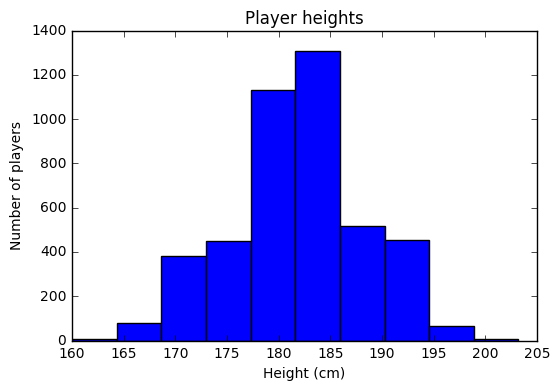

In [28]:
hist, bins = np.histogram(heights, bins=10)
width = 1 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.title('Player heights')
plt.xlabel('Height (cm)')
plt.ylabel('Number of players')
plt.bar(center, hist, align='center', width=width)
plt.show()

In [30]:
np_heights = np.array(heights)
np_weights = np.array(weights)

In [31]:
np.corrcoef(np_heights, np_weights)

array([[ 1.        ,  0.76723837],
       [ 0.76723837,  1.        ]])